# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

BTC = 1.2
ETH = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price

response_data_BTC = requests.get(btc_url)

response_content_BTC = response_data_BTC.content

data_BTC = response_data_BTC.json()

selected_value_BTC = data_BTC["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price

response_data_ETH = requests.get(eth_url)

response_content_ETH = response_data_ETH.content

data_ETH = response_data_ETH.json()

selected_value_ETH = data_ETH["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto

BTC_value = BTC * selected_value_BTC
ETH_value = ETH * selected_value_ETH

# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${BTC_value:0.2f}")
print(f"The current value of your {ETH} ETH is ${ETH_value:0.2f}")

The current value of your 1.2 BTC is $27596.40
The current value of your 5.3 ETH is $8663.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

# Reorganize the DataFrame

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames

df_portfolio= pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame

df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-07-14 04:00:00+00:00  118.58  118.74  118.58  118.67  3986756   

                                                     SPY                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-07-14 04:00:00+00:00       14580  118.667216  313.3  319.76  312.0   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  318.93  93545651      580270  316.244144

In [9]:
# Pick AGG and SPY close prices

AGG_price = float(df_portfolio["AGG"]["close"])
SPY_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_price}")
print(f"Current SPY closing price: ${SPY_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.93


In [10]:
# Compute the current value of shares

AGG_value = my_agg * AGG_price
SPY_value = my_spy * SPY_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${SPY_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_value:0.2f}")

The current value of your 50 SPY shares is $15946.50
The current value of your 200 AGG shares is $23734.00


### Savings Health Analysis

In [27]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

savings = {
    BTC_value + ETH_value,
    AGG_value + SPY_value
}

# Create savings DataFrame

df_savings = pd.DataFrame(savings, columns=["amount"], index=["Total Crypto Assets","Total Share Assets"])

# Display savings DataFrame
display(df_savings)

,amount
Total Crypto Assets,39680.50
Total Share Assets,36260.31


<AxesSubplot:ylabel='amount'>

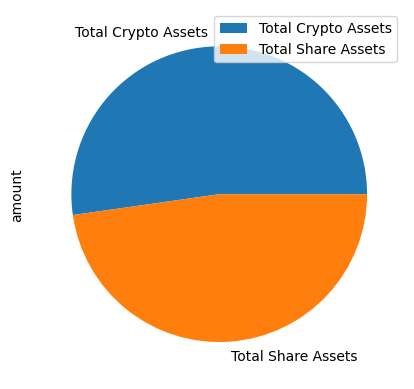

In [29]:
# Plot savings pie chart

df_savings.plot.pie(y="amount")

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = float(df_savings.sum())

# Validate saving health

if total_savings > emergency_fund:
  print("Congratulations you have enough money in the emergency fund")
elif total_savings == emergency_fund:
  print("Congratulations on reaching this financial goal")
else:
  print(f"You are ${emergency_fund - total_savings}away from reaching the goal")



Congratulations you have enough money in the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

timeframe = "1Day"

start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

tickers = ["SPY","AGG"]

df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()

# Reorganize the DataFrame
# Separate ticker data

SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames

df_stock_data = pd.concat([SPY,AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  238.68  239.1700  238.195  238.63  66882521   
2017-05-02 04:00:00+00:00  238.84  238.9800  238.300  238.76  57375732   
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.52  73137731   
2017-05-04 04:00:00+00:00  238.83  238.9225  237.780  238.74  61462732   
2017-05-05 04:00:00+00:00  239.19  239.7200  238.680  239.68  62001269   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-05-01 04:00:00+00:00      180740  238.682276  108.86  108.9599  108.620   
2017-05-02 04:00:00+00:00      176648  238.630973  108.68  108.9400  108.679   
2017-05-03 04:00:00+00:00      223568  238.418100  108.97  108.9900  108.770   
2017-05-04 04:00:00+00:00      208872  238.541805  108.55  108.7000  108.550   
2017-05-05 04:00:00+00:00      204885  239.253410  108.72  108.7400  108.570   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2017-05-01 04:00:00+00:00  108.730  2510027       11008  108.743679  
2017-05-02 04:00:00+00:00  108.885  2841518        9263  108.831870  
2017-05-03 04:00:00+00:00  108.795  1923403       10987  108.902870  
2017-05-04 04:00:00+00:00  108.680  1897912        7501  108.629678  
2017-05-05 04:00:00+00:00  108.700  1421843        7385  108.675918

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data

MC_even_dist.portfolio_data.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  238.68  239.1700  238.195  238.63  66882521   
2017-05-02 04:00:00+00:00  238.84  238.9800  238.300  238.76  57375732   
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.52  73137731   
2017-05-04 04:00:00+00:00  238.83  238.9225  237.780  238.74  61462732   
2017-05-05 04:00:00+00:00  239.19  239.7200  238.680  239.68  62001269   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-01 04:00:00+00:00      180740  238.682276          NaN  108.86   
2017-05-02 04:00:00+00:00      176648  238.630973     0.000545  108.68   
2017-05-03 04:00:00+00:00      223568  238.418100    -0.001005  108.97   
2017-05-04 04:00:00+00:00      208872  238.541805     0.000922  108.55   
2017-05-05 04:00:00+00:00      204885  239.253410     0.003937  108.72   

                                                                            \
                               high      low    close   volume trade_count   
timestamp                                                                    
2017-05-01 04:00:00+00:00  108.9599  108.620  108.730  2510027       11008   
2017-05-02 04:00:00+00:00  108.9400  108.679  108.885  2841518        9263   
2017-05-03 04:00:00+00:00  108.9900  108.770  108.795  1923403       10987   
2017-05-04 04:00:00+00:00  108.7000  108.550  108.680  1897912        7501   
2017-05-05 04:00:00+00:00  108.7400  108.570  108.700  1421843        7385   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-01 04:00:00+00:00  108.743679          NaN  
2017-05-02 04:00:00+00:00  108.831870     0.001426  
2017-05-03 04:00:00+00:00  108.902870    -0.000827  
2017-05-04 04:00:00+00:00  108.629678    -0.001057  
2017-05-05 04:00:00+00:00  108.675918     0.000184

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/troycassels/Documents/USYD-VIRT-FIN-PT-12-2022-U-LOLC/05-APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997309,0.993440,0.993007,1.007023,1.004065,1.003648,0.992361,0.994199,0.981065,0.997780,...,1.010137,0.994799,1.003104,0.983740,1.007166,0.996999,1.005102,0.998559,1.000723,0.997784
2,0.997447,0.996642,1.012901,1.005969,1.000275,1.009396,0.989453,0.992995,0.992242,0.994353,...,1.022849,0.996569,1.002140,0.986805,1.010737,1.018525,1.004243,1.005053,1.000724,0.996245
3,0.992638,0.997371,1.010018,1.006480,0.997615,1.012133,0.986523,1.000661,0.985240,1.010744,...,1.024852,1.008544,1.007890,0.972978,1.015831,1.004955,1.006911,1.005391,1.009368,1.004113
4,0.996678,1.006802,1.018380,1.009699,1.006359,1.015780,0.992907,0.986586,0.998406,1.009032,...,1.020034,1.017364,1.016289,0.974831,1.016845,1.009462,1.011608,1.004685,1.009414,0.997250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.404851,7.090881,21.624500,51.194944,10.151277,24.764067,24.074548,18.248465,8.605111,7.191000,...,11.904067,37.480251,4.080754,16.730592,21.375054,15.018090,16.147080,9.794128,7.366765,13.244061
7557,15.486510,7.030497,21.447379,50.871583,10.126472,25.023017,24.015801,18.267555,8.491402,7.219782,...,11.788887,37.598561,4.088716,16.557724,21.559005,15.101368,15.897186,9.856321,7.335966,13.225049
7558,15.582446,7.054961,21.590166,50.896961,10.043811,24.940400,23.960160,18.285758,8.557656,7.146506,...,11.871971,37.579015,4.067690,16.318567,21.371103,15.169795,16.009045,10.005660,7.412716,13.336533
7559,15.482707,7.059889,21.751544,51.003211,10.202146,24.770922,24.277124,18.269071,8.594899,7.100311,...,11.748192,37.114138,4.071853,16.265980,21.623741,15.043505,16.154670,9.970707,7.325508,13.161346


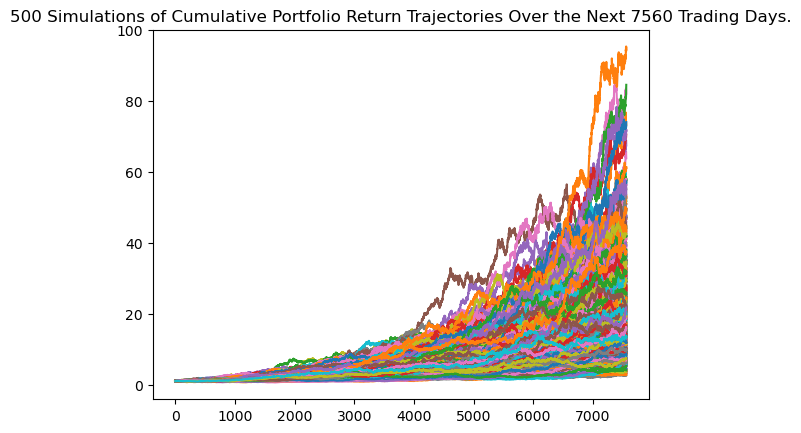

In [19]:
# Plot simulation outcomes

line_plot = MC_even_dist.plot_simulation()

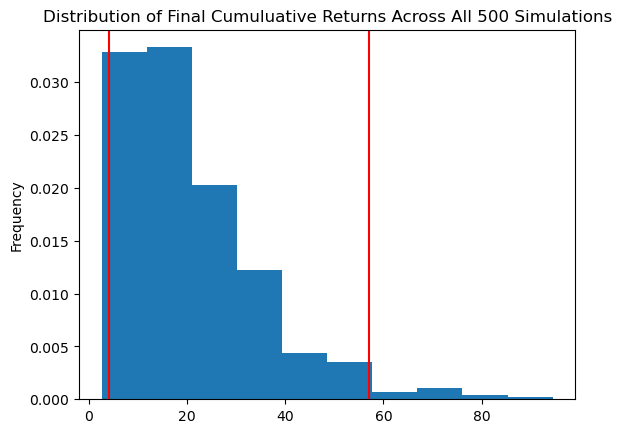

In [20]:
# Plot probability distribution and confidence intervals

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results

even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics

print(even_tbl)

count           500.000000
mean             20.705989
std              14.238834
min               2.581028
25%              10.031731
50%              17.168884
75%              27.326705
max              94.479334
95% CI Lower      3.979276
95% CI Upper     57.143674
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $79585.52 and $1142873.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $119378.28 and $1714310.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")